In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../dataset/telco-customer-churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Churn by Gender (Counts)')

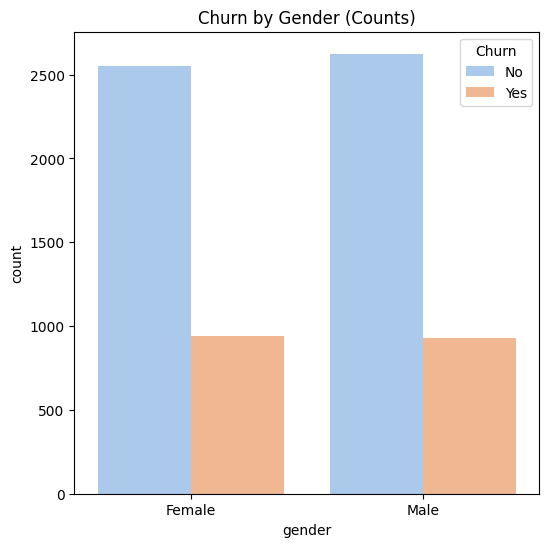

In [12]:
f, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x="gender", hue="Churn", data=df, palette="pastel", ax=ax)
ax.set_title("Churn by Gender (Counts)")

In [13]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


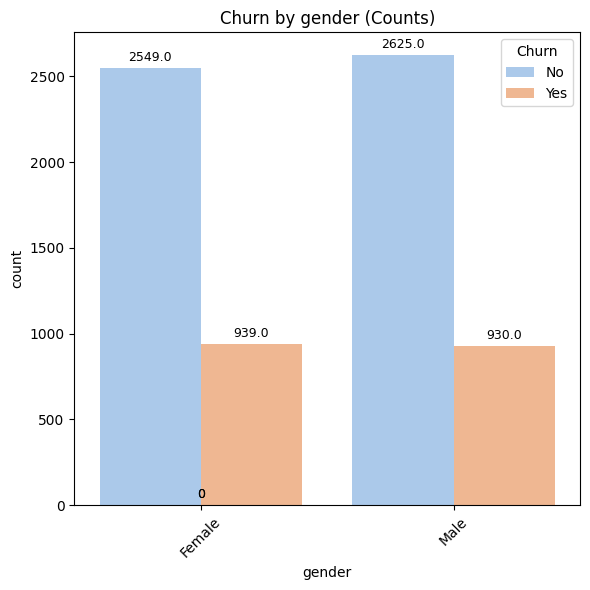

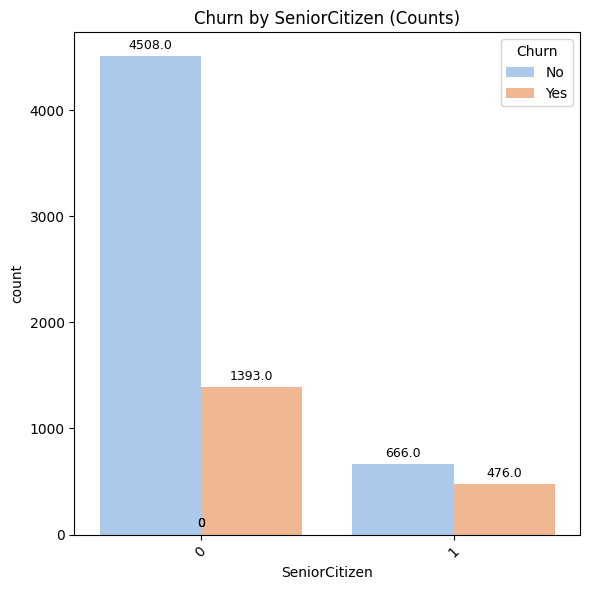

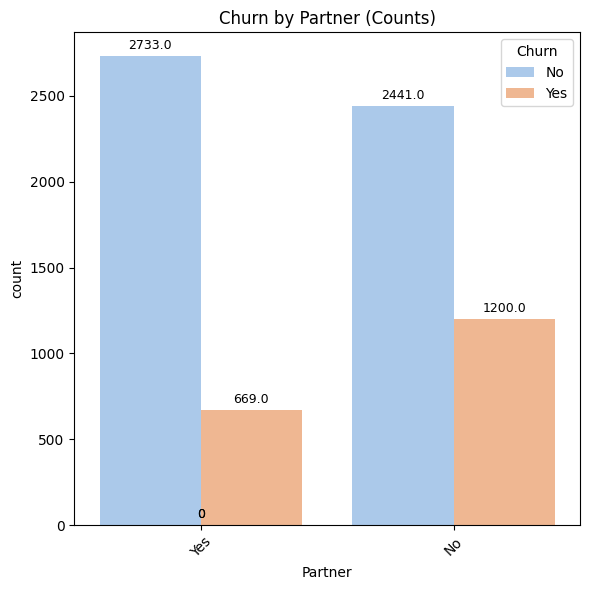

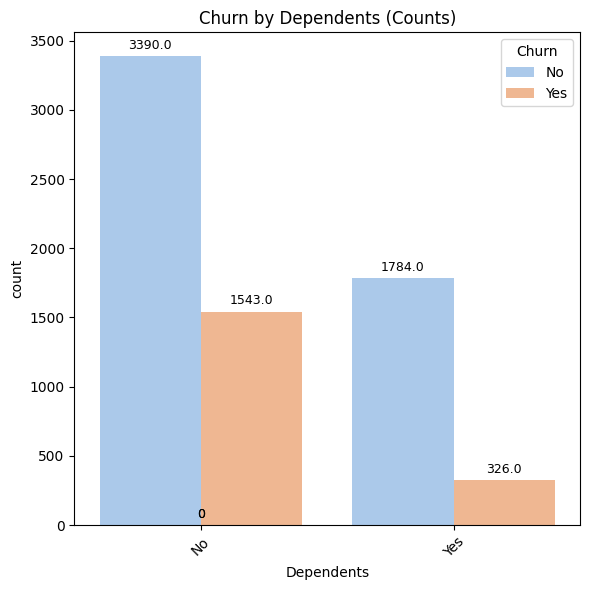

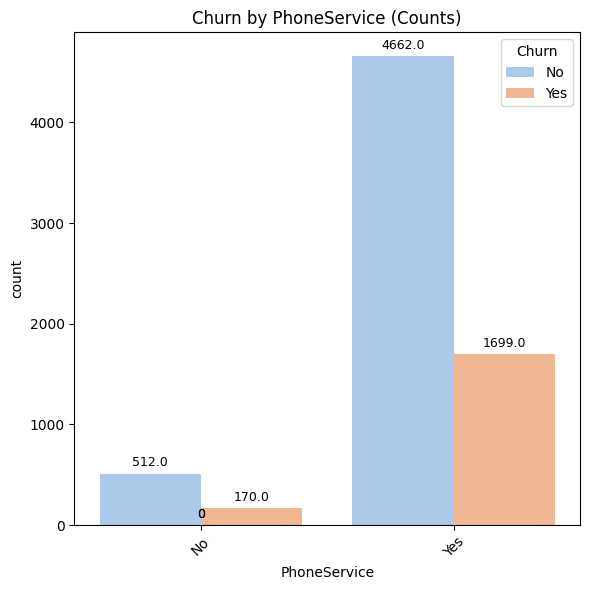

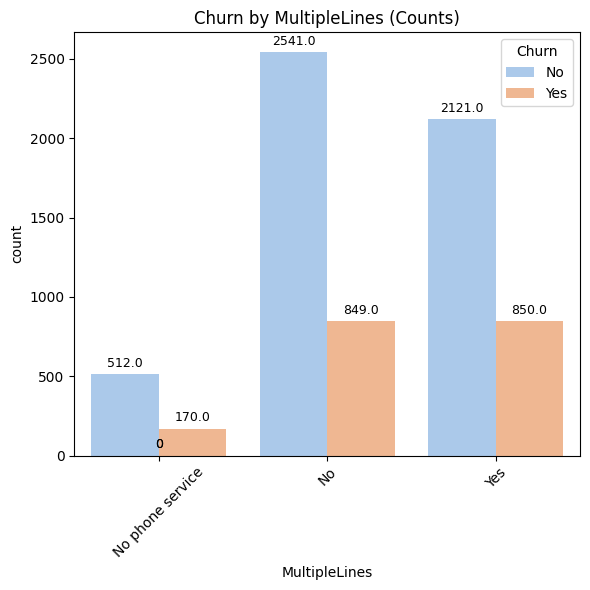

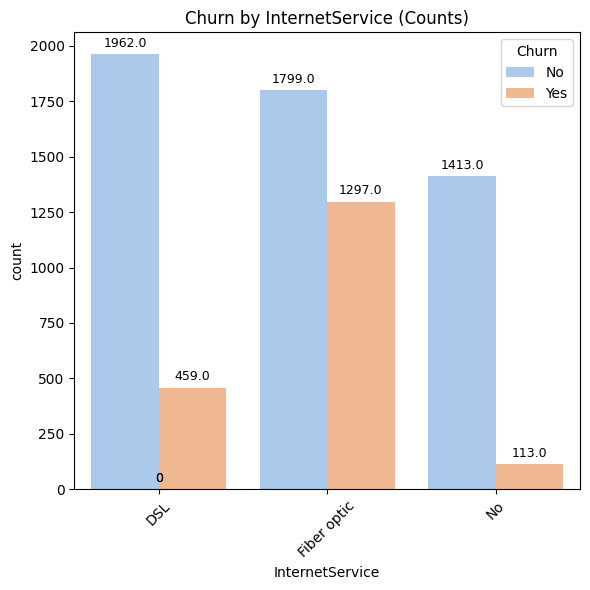

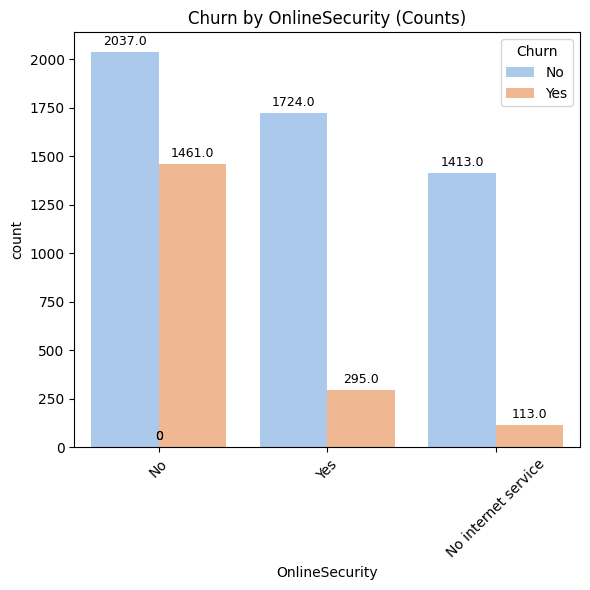

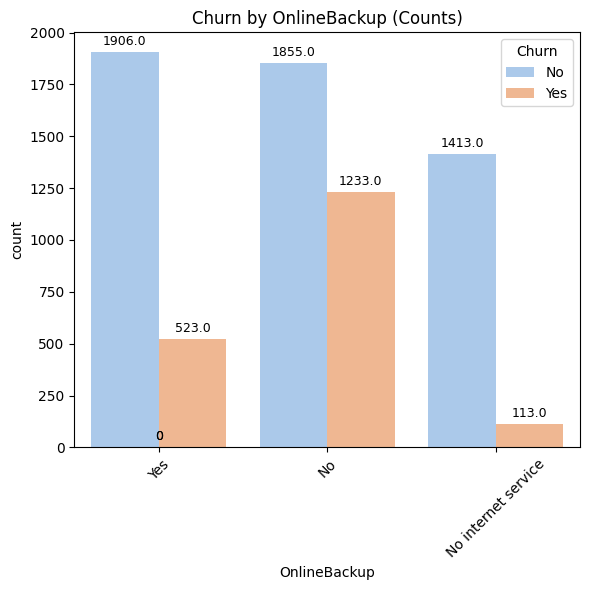

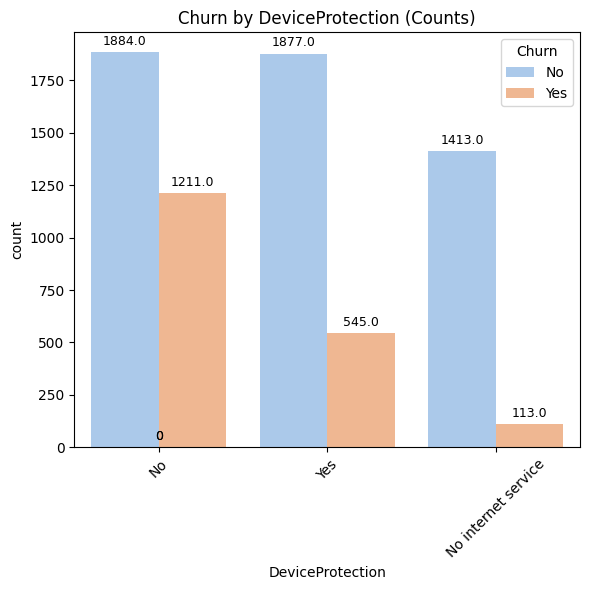

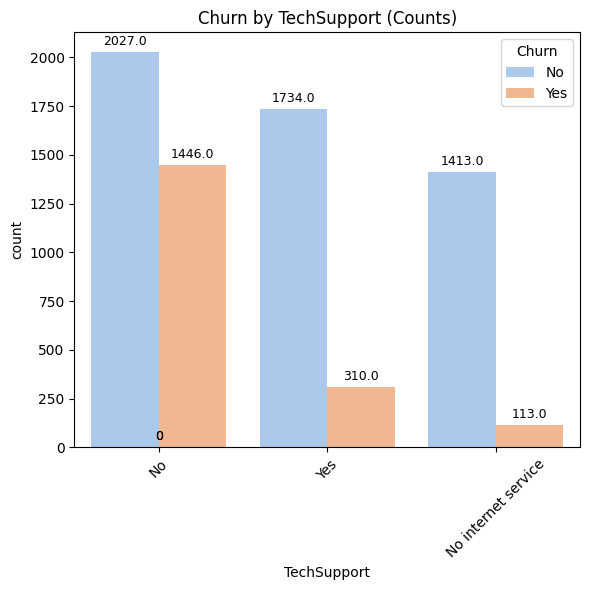

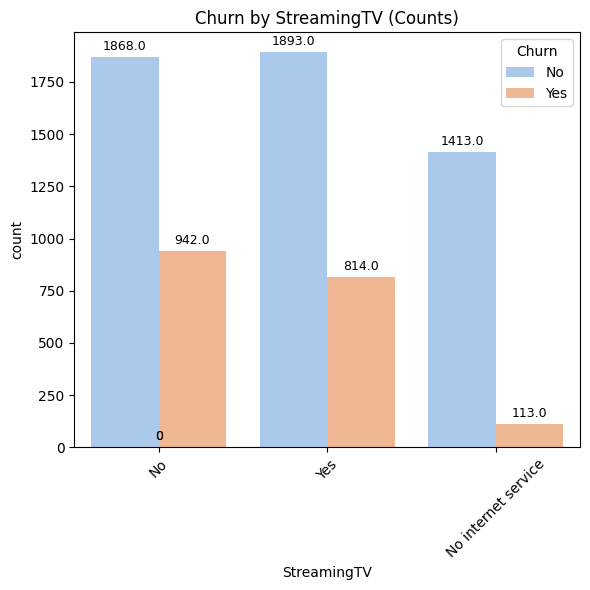

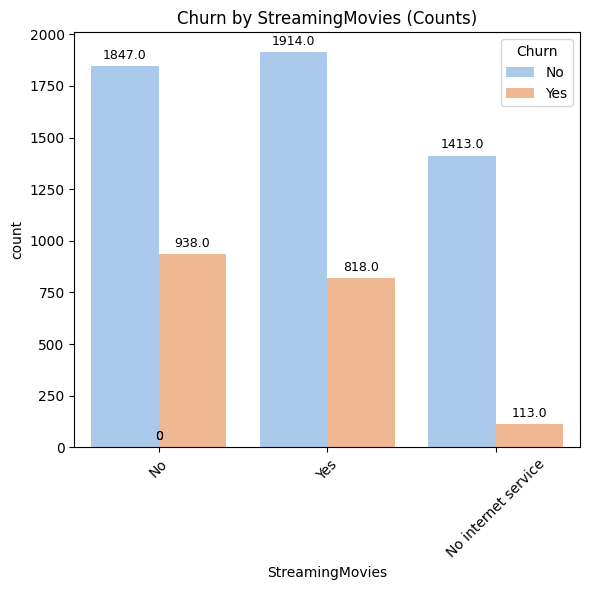

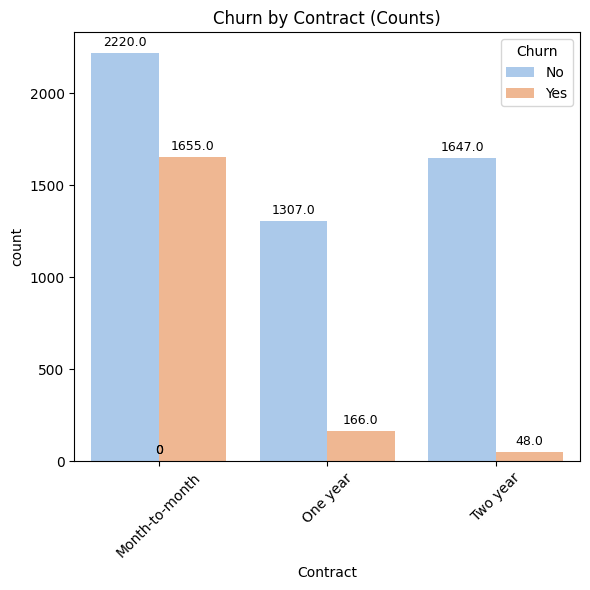

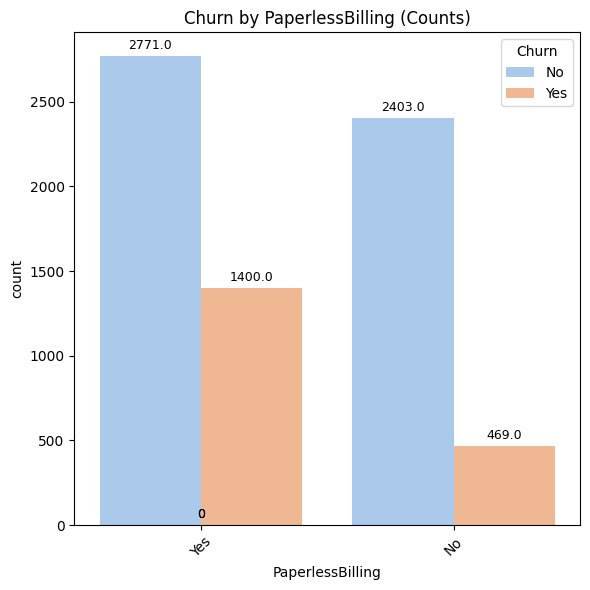

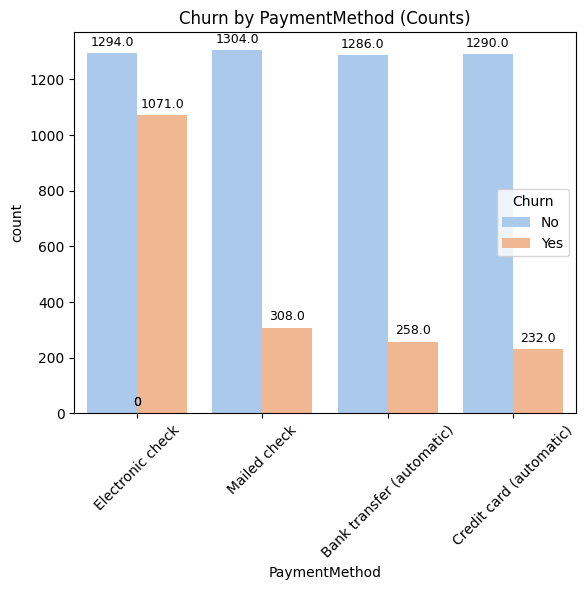

In [23]:
for col in df.columns:
    if col in ["tenure", "customerID", "MonthlyCharges", "TotalCharges", "Churn"]:
        continue
    f, ax = plt.subplots(figsize=(6, 6))
    sns.countplot(x=col, hue="Churn", data=df, palette="pastel", ax=ax)
    ax.set_title(f"Churn by {col} (Counts)")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                    textcoords='offset points')
    plt.xticks(rotation=45)  # rotate x labels for readability
    plt.tight_layout()
    plt.show()


- gender does not matter
- senior citizen evenly distributed
- if no dependents, more likely to churn
- internet service has affect on churn (fiber optic service user more likely churned, indicates problems)
- online security with no churned more, indicates there is not enough awareness for it
- no to online backup churned more,
- no to device protection churned more
- no to tech-support churned more
- streaming-tv, streaming-movies barely makes difference
- customer with month-to-month contract churned more
- customer with paperless-billing, electronic-check churned more

In [22]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
values = df["InternetService"].value_counts()
labels = df["InternetService"].unique()

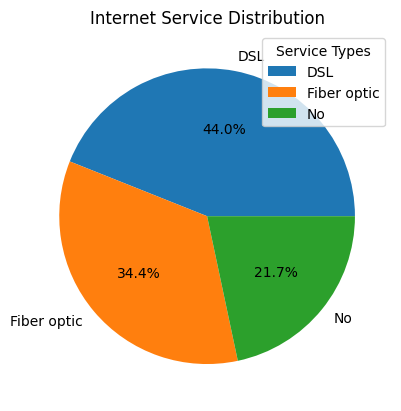

In [39]:
plt.pie(x=values, labels=labels, autopct='%1.1f%%')
plt.title("Internet Service Distribution")
plt.legend(title="Service Types", loc=1)
plt.show()

In [40]:
churned = df[df["Churn"] == "Yes"]

In [41]:
churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [42]:
values = churned["InternetService"].value_counts()

In [44]:
labels = values.index

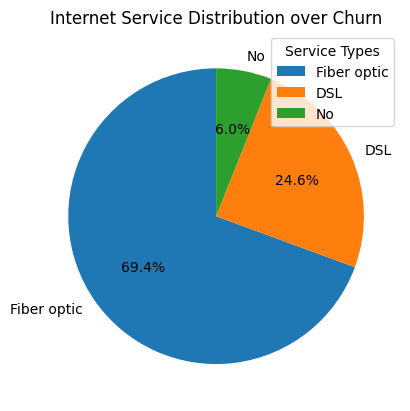

In [45]:
plt.pie(
    x=values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Internet Service Distribution over Churn")
plt.legend(loc="upper right", title="Service Types")
plt.show()

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
important_columns = ["Dependents", "PhoneService","InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]

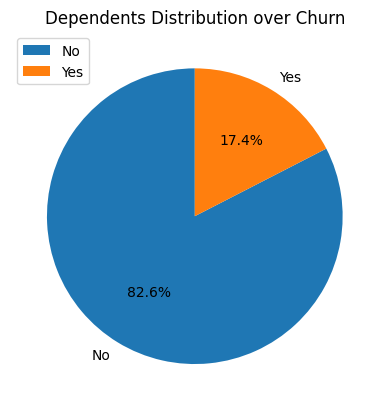

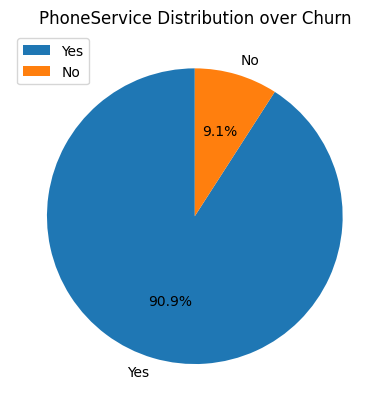

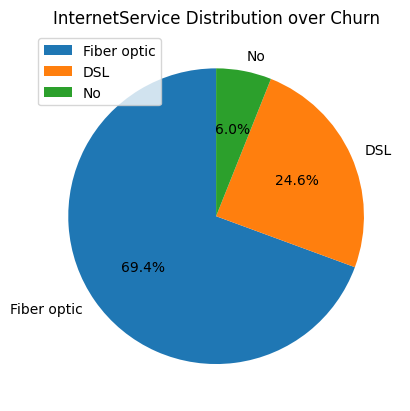

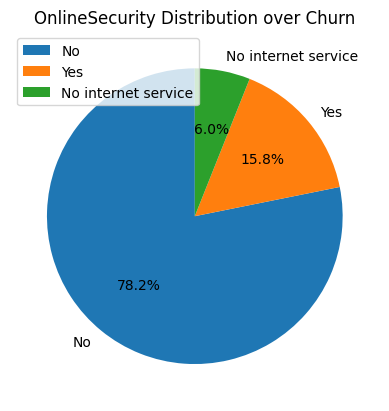

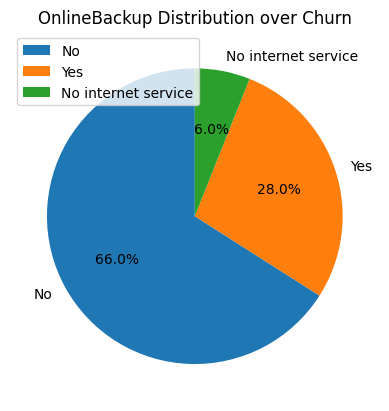

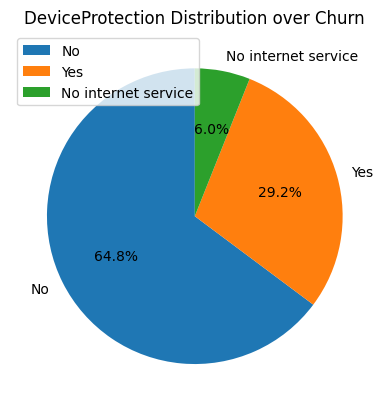

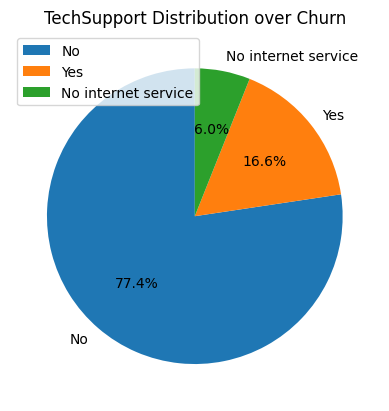

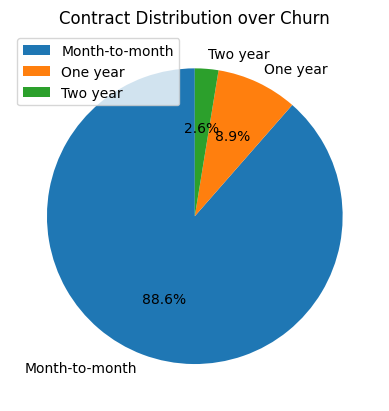

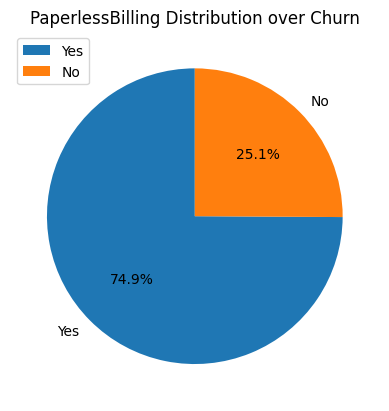

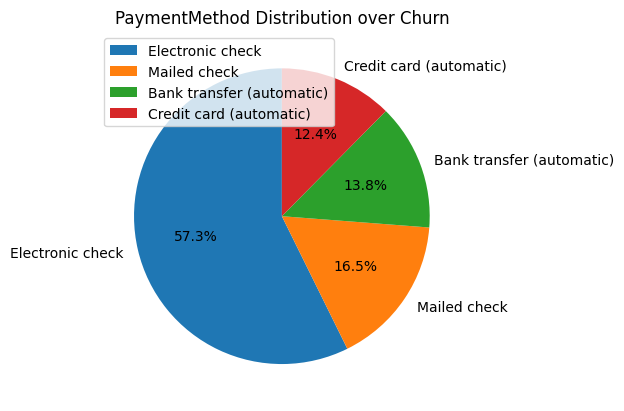

In [51]:
for col in important_columns:
    values = churned[col].value_counts()
    labels = values.index

    plt.pie(
        x=values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{col} Distribution over Churn")
    plt.legend(loc="upper left")
    plt.show()


In [52]:
not_churned = df[df["Churn"] == "No"]

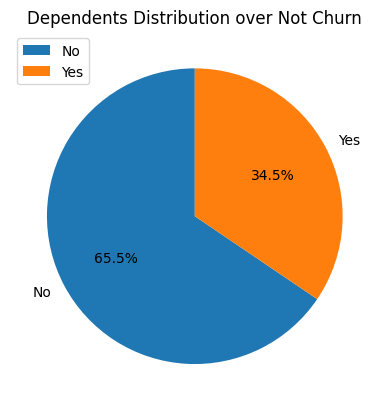

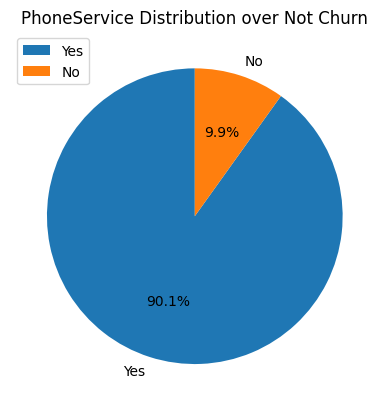

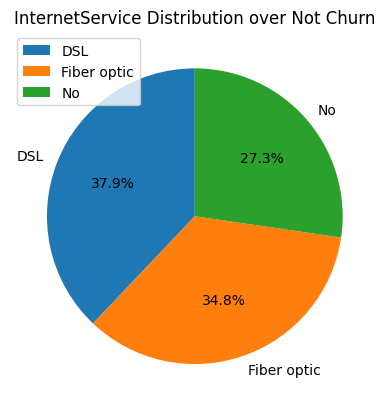

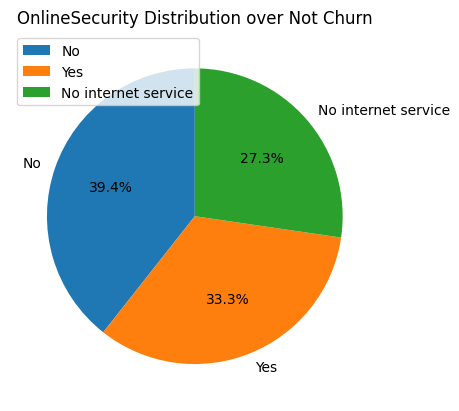

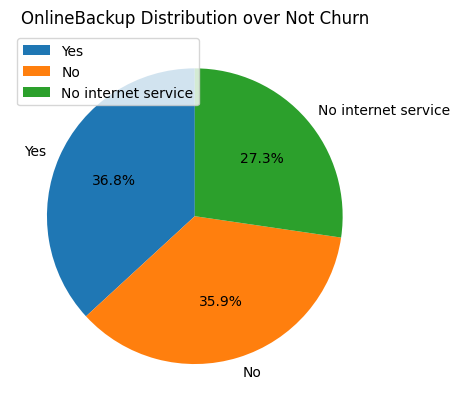

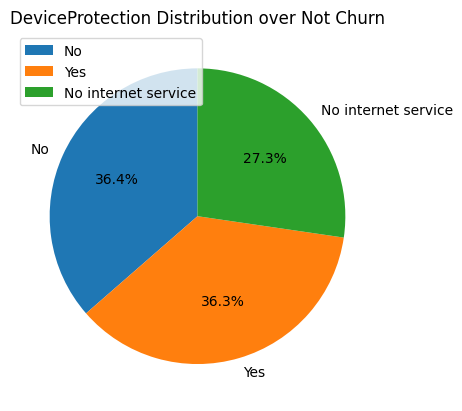

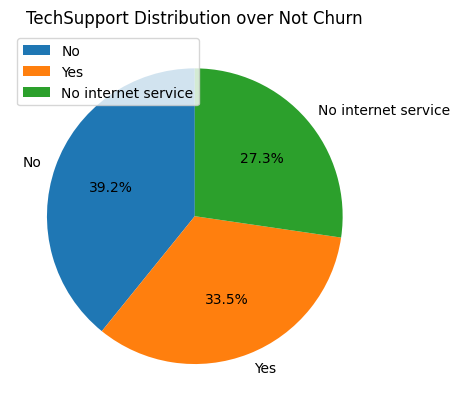

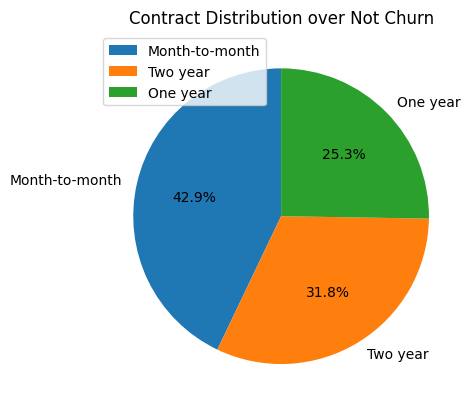

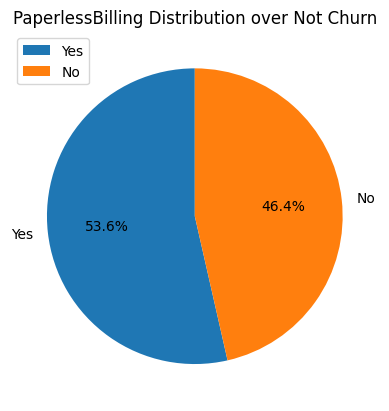

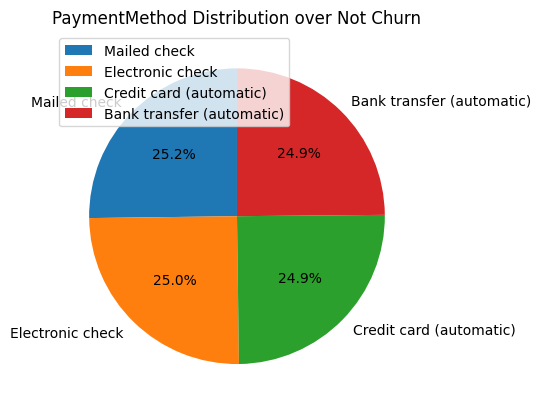

In [54]:
for col in important_columns:
    values = not_churned[col].value_counts()
    labels = values.index

    plt.pie(
        x=values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f"{col} Distribution over Not Churn")
    plt.legend(loc="upper left")
    plt.show()


In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
num_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

In [60]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [61]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
df = df.dropna(subset=["TotalCharges"])

In [63]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [65]:
for col in df.columns:
    if col in num_columns:
        df[col].describe()

In [66]:
df["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [70]:
churn_map = {
    "No": 0,
    "Yes": 1,
}

In [71]:
df["Churn"] = df["Churn"].map(churn_map)

In [72]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

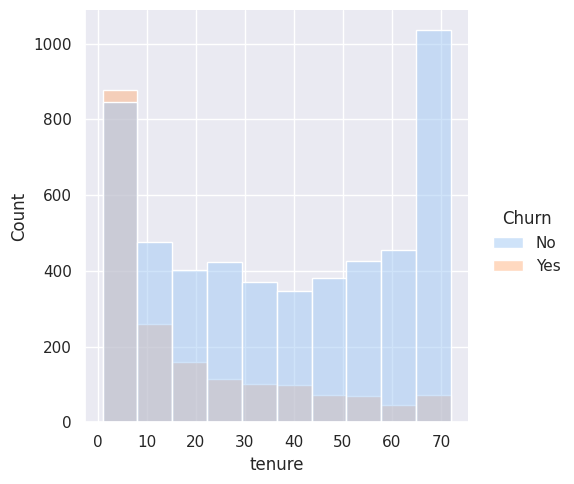

In [67]:
sns.set_theme(style="darkgrid")
sns.displot(
    x="tenure", hue="Churn", data=df, bins=10, palette="pastel"
)

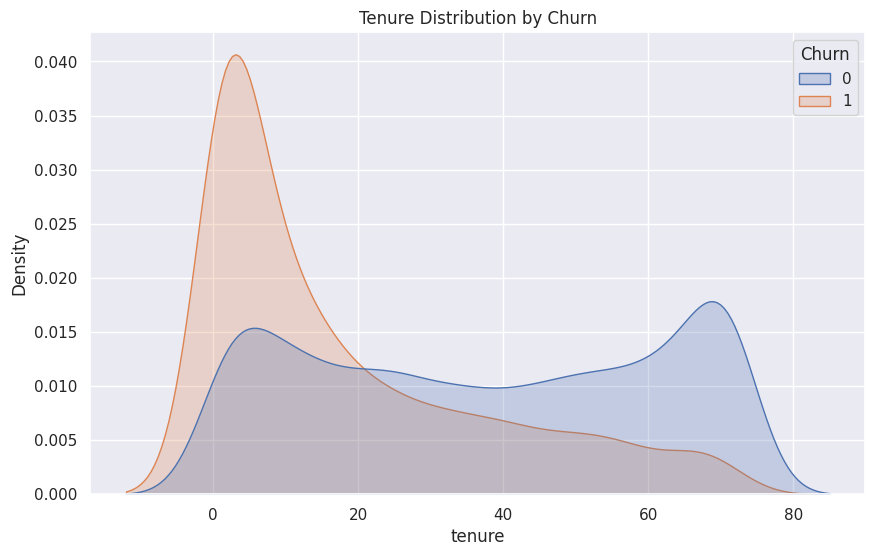

In [74]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

In [75]:
df["TotalCharges"].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [76]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

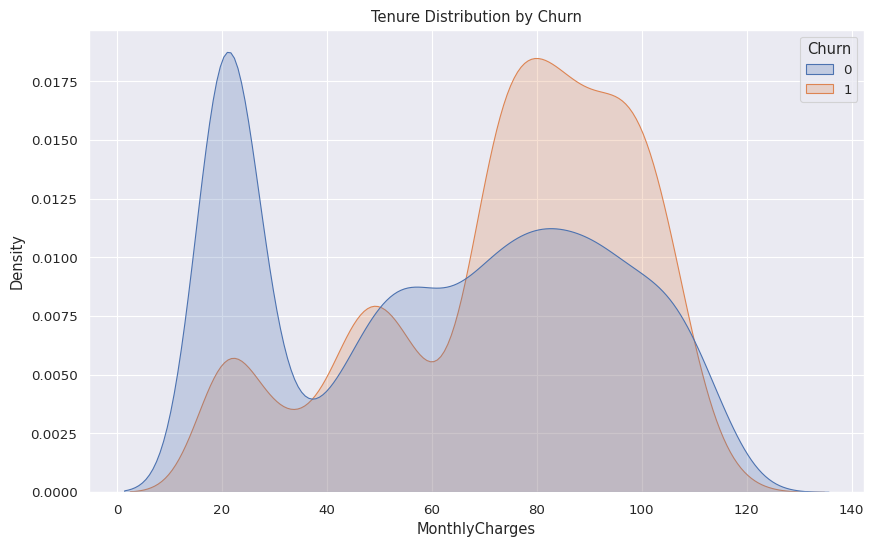

In [79]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

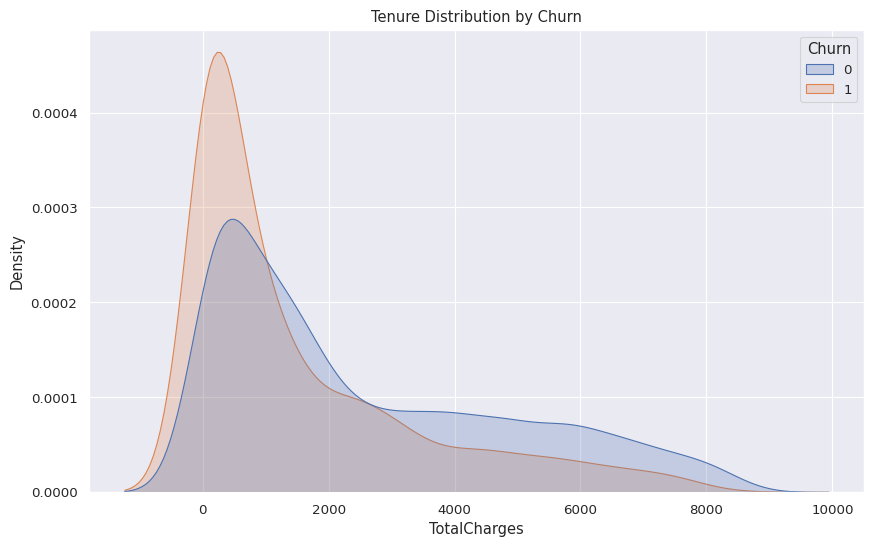

In [80]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, common_norm=False)
plt.title("Tenure Distribution by Churn")
plt.show()

In [85]:
obj_columns = df.select_dtypes(include=["object"]).columns
print(obj_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
